#### Author: Kubam Ivo Mbi
#### Date: 9/1/2020

# Description
The housing train dataset consist of 1460 records with 81 variables. The average selling price of houses was 180,921.2\$ with the least sold at 34,900\$ 
and the most expensive at 755,000\$. The sale price distribution was left skewed as most houses were sold less than the median value of 163,085\$. 
Four of the variables (Alley, PoolQC, Fence, MiscFeature ) had more than 50% of missing values. There was a strong correlation between saleprice vs Overallqual
Saleprice vs GrLivArea.  

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import train dataset
train_df = pd.read_csv("train.csv")

In [10]:
# dataset dimension
train_df.shape

(1460, 81)

In [4]:
# Preview the dataset
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# dropping the ID column
train_df = train_df.drop("Id",axis=1)


In [19]:
# Separating numerical and categorical variables
train_df_num = train_df.select_dtypes(exclude='object')
train_df_num = train_df_num.drop(["MSSubClass","OverallCond","YearBuilt", "YearRemodAdd","MoSold","YrSold"],axis=1)
train_df_cat = train_df.select_dtypes(include='object')



In [20]:
# Summary Statistics for Numerical variables
train_df_num.describe()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,1.382997,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,6.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,7.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [24]:

# Checking missing values
100 * train_df.isnull().sum()/len(train_df)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

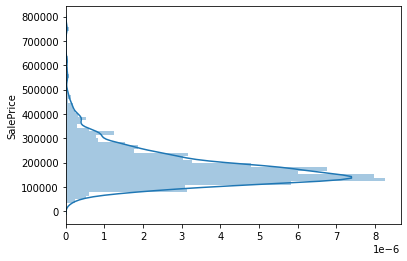

In [9]:
# Distribution of saleprice
sns.distplot(train_df["SalePrice"], vertical=True)

In [25]:
# Correlation heatmap
corr = train_df_num.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1,0.43,0.25,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.038,0.4,0.1,-0.0072,0.2,0.054,0.26,-0.0061,0.35,0.27,0.07,0.29,0.34,0.089,0.15,0.011,0.07,0.041,0.21,0.0034,0.35
LotArea,0.43,1,0.11,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,-0.025,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.26
OverallQual,0.25,0.11,1,0.41,0.24,-0.059,0.31,0.54,0.48,0.3,-0.03,0.59,0.11,-0.04,0.55,0.27,0.1,-0.18,0.43,0.4,0.55,0.6,0.56,0.24,0.31,-0.11,0.03,0.065,0.065,-0.031,0.79
MasVnrArea,0.19,0.1,0.41,1,0.26,-0.072,0.11,0.36,0.34,0.17,-0.069,0.39,0.085,0.027,0.28,0.2,0.1,-0.038,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.019,0.061,0.012,-0.03,0.48
BsmtFinSF1,0.23,0.21,0.24,0.26,1,-0.05,-0.5,0.52,0.45,-0.14,-0.065,0.21,0.65,0.067,0.059,0.0043,-0.11,-0.081,0.044,0.26,0.15,0.22,0.3,0.2,0.11,-0.1,0.026,0.062,0.14,0.0036,0.39
BsmtFinSF2,0.05,0.11,-0.059,-0.072,-0.05,1,-0.21,0.1,0.097,-0.099,0.015,-0.0096,0.16,0.071,-0.076,-0.032,-0.016,-0.041,-0.035,0.047,-0.088,-0.038,-0.018,0.068,0.0031,0.037,-0.03,0.089,0.042,0.0049,-0.011
BsmtUnfSF,0.13,-0.0026,0.31,0.11,-0.5,-0.21,1,0.42,0.32,0.0045,0.028,0.24,-0.42,-0.096,0.29,-0.041,0.17,0.03,0.25,0.052,0.19,0.21,0.18,-0.0053,0.13,-0.0025,0.021,-0.013,-0.035,-0.024,0.21
TotalBsmtSF,0.39,0.26,0.54,0.36,0.52,0.1,0.42,1,0.82,-0.17,-0.033,0.45,0.31,-0.00031,0.32,-0.049,0.05,-0.069,0.29,0.34,0.32,0.43,0.49,0.23,0.25,-0.095,0.037,0.084,0.13,-0.018,0.61
1stFlrSF,0.46,0.3,0.48,0.34,0.45,0.097,0.32,0.82,1,-0.2,-0.014,0.57,0.24,0.002,0.38,-0.12,0.13,0.068,0.41,0.41,0.23,0.44,0.49,0.24,0.21,-0.065,0.056,0.089,0.13,-0.021,0.61
2ndFlrSF,0.08,0.051,0.3,0.17,-0.14,-0.099,0.0045,-0.17,-0.2,1,0.063,0.69,-0.17,-0.024,0.42,0.61,0.5,0.059,0.62,0.19,0.071,0.18,0.14,0.092,0.21,0.062,-0.024,0.041,0.081,0.016,0.32
